In [1]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [4]:
%matplotlib inline

In [45]:
shp_path = "shapefile/ABS_2018/RegionsS_2018.shp"
sf = shp.Reader(shp_path,encoding = "ISO8859-1")

In [46]:
len(sf.shapes())


7

In [47]:
sf.records()

[Record #0: ['62', 'Regió Sanitària Camp de Tarragona', 2755252310.44],
 Record #1: ['64', 'Regió Sanitària Girona', 5765363355.15],
 Record #2: ['78', 'Regió Sanitària Barcelona', 2954231351.96],
 Record #3: ['67', 'Regió Sanitària Catalunya Central', 6067786926.77],
 Record #4: ['63', "Regió Sanitària Terres de l'Ebre", 3355167488.44],
 Record #5: ['71', 'Regió Sanitària Alt Pirineu i Aran', 5782986932.98],
 Record #6: ['61', 'Regió Sanitària Lleida', 5424542586.13]]

In [18]:
def plot_map2(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [52]:
def plot_map(sf, figsize = (11,9)):

    plt.figure(figsize = figsize)
    for shape in sf.shapeRecords():
        for i in range(len(shape.shape.parts)):
            i_start = shape.shape.parts[i]
            if i==len(shape.shape.parts)-1:
                i_end = len(shape.shape.points)
            else:
                i_end = shape.shape.parts[i+1]
            x = [i[0] for i in shape.shape.points[i_start:i_end]]
            y = [i[1] for i in shape.shape.points[i_start:i_end]]
            plt.plot(x,y)
    plt.show()

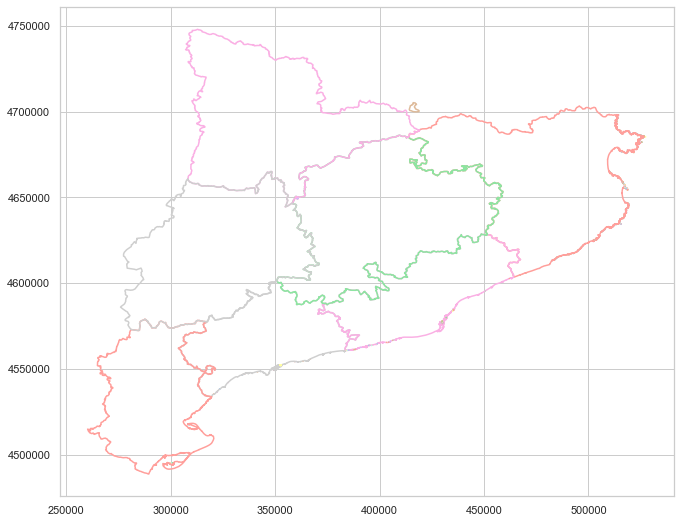

In [53]:
plot_map(sf)

In [61]:
import geopandas as gpd
df=gpd.read_file("shapefile/ABS_2018/RegionsS_2018.shp")
df

,CODIRS,NOMRS,ÀREA,geometry
0,62,Regió Sanitària Camp de Tarragona,2.755252e+09,"MULTIPOLYGON (((323341.750 4538212.510, 323344..."
1,64,Regió Sanitària Girona,5.765363e+09,"MULTIPOLYGON (((470266.440 4606110.290, 470267..."
2,78,Regió Sanitària Barcelona,2.954231e+09,"MULTIPOLYGON (((395337.879 4563748.012, 395336..."
3,67,Regió Sanitària Catalunya Central,6.067787e+09,"POLYGON ((359427.518 4594965.930, 359390.449 4..."
4,63,Regió Sanitària Terres de l'Ebre,3.355167e+09,"MULTIPOLYGON (((293729.790 4495731.740, 293731..."
5,71,Regió Sanitària Alt Pirineu i Aran,5.782987e+09,"MULTIPOLYGON (((360797.149 4650206.542, 360960..."
6,61,Regió Sanitària Lleida,5.424543e+09,"POLYGON ((319752.200 4581218.100, 319337.600 4..."


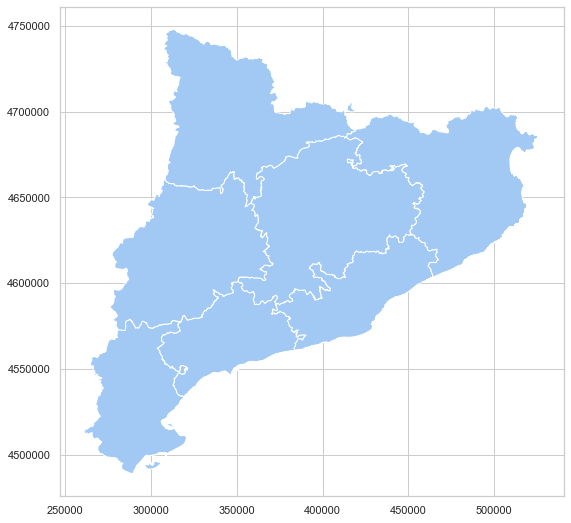

In [58]:
df.plot(figsize = (11,9))

In [62]:
df.columns



Index(['CODIRS', 'NOMRS', 'ÀREA', 'geometry'], dtype='object')

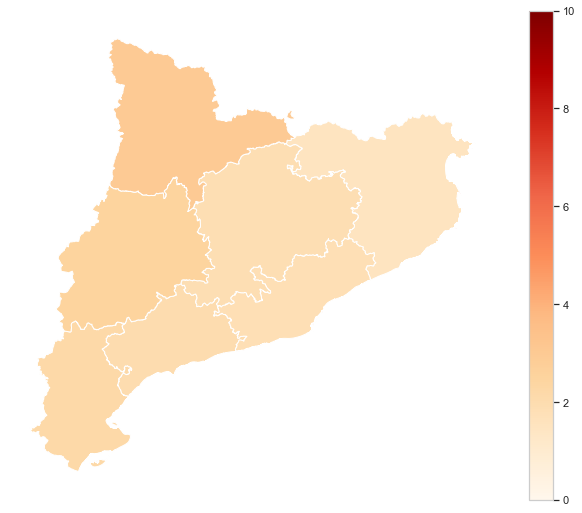

In [75]:
df["Vacunats"]=[2,1.5,1.8,1.9,2.2,3,2.5]
fig, ax = plt.subplots(figsize = (11,9))
ax.axis("off")
df.plot(ax=ax,column='Vacunats',  legend=True,cmap='OrRd', vmin=0, vmax=10)
plt.savefig('testmap.png')